In [66]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

In [67]:
#importar el csv de ndemandas
df=pd.read_csv(r"..\Dataset limpios\demanda_dataset.csv")

In [68]:
df.rename(columns={"Unnamed: 0":"fecha"}, inplace=True)

In [69]:
df=df.set_index(df["fecha"])


In [70]:
df=df.iloc[:,1:]

print("shape is:",df.shape)

shape is: (187, 38)


In [111]:
df

,AL,AR,AZ,CA,CO,CT,FL,GA,HI,IA,...,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI
fecha,,,,,,,,,,,,,,,,,,,,,
2008-02-29,618.0,572.0,3334.0,10637.0,2808.0,2329.0,9236.0,4071.0,613.0,481.0,...,1613.0,5321.0,644.0,1696.0,3112.0,7544.0,1436.0,4292.0,2279.0,1029.0
2008-03-31,800.0,663.0,3975.0,13144.0,3476.0,3080.0,10878.0,4381.0,770.0,496.0,...,1892.0,6451.0,836.0,2014.0,3596.0,8744.0,1659.0,5125.0,2695.0,1363.0
2008-04-30,818.0,688.0,4431.0,16200.0,3978.0,3335.0,11801.0,4483.0,859.0,659.0,...,1863.0,7324.0,912.0,2120.0,3746.0,9400.0,1846.0,5680.0,2848.0,1640.0
2008-05-31,873.0,799.0,4680.0,17989.0,4418.0,3977.0,12056.0,4735.0,762.0,729.0,...,2096.0,7788.0,1093.0,2266.0,4075.0,10431.0,1976.0,6002.0,2947.0,1966.0
2008-06-30,926.0,774.0,4419.0,18491.0,4688.0,4726.0,11985.0,4962.0,659.0,768.0,...,2062.0,8753.0,1173.0,2348.0,4103.0,10662.0,2003.0,6872.0,3049.0,2217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,1064.0,676.0,6758.0,17451.0,4502.0,1946.0,21383.0,6156.0,546.0,526.0,...,2002.0,7220.0,874.0,2816.0,4251.0,10448.0,1805.0,7325.0,2938.0,1446.0
2023-05-31,1273.0,805.0,8015.0,21256.0,5415.0,2362.0,24171.0,6981.0,607.0,545.0,...,2342.0,8444.0,1077.0,3357.0,5432.0,12896.0,2114.0,9017.0,3358.0,1876.0
2023-06-30,1194.0,881.0,7128.0,20573.0,5543.0,3081.0,22844.0,6862.0,645.0,598.0,...,2519.0,9801.0,1303.0,3505.0,5468.0,12548.0,2092.0,9144.0,3503.0,2145.0


In [71]:
df1 = df[['AR']]

<Axes: xlabel='fecha'>

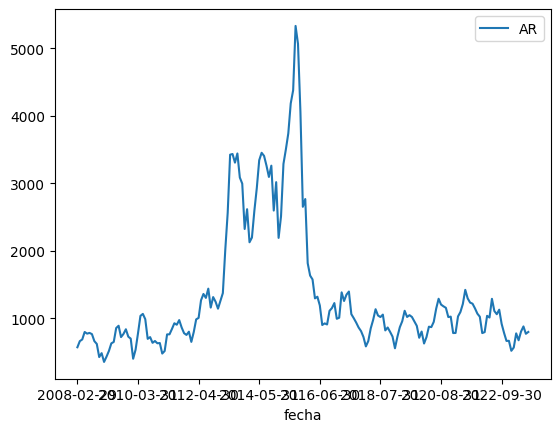

In [72]:
df1.plot()

In [104]:
df1

,AR
fecha,
2008-02-29,572.0
2008-03-31,663.0
2008-04-30,688.0
2008-05-31,799.0
2008-06-30,774.0
...,...
2023-04-30,676.0
2023-05-31,805.0
2023-06-30,881.0


In [73]:
train=df1.loc[df.index<"2020-08-31"]
test=df1.loc[df.index>="2020-08-31"]

In [108]:
train.values.shape

(150, 1)

In [107]:
test.values.shape

(37, 1)

In [74]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(train)

In [75]:
time_step = 24
x_train = []
y_train = []

m = len(set_entrenamiento_escalado)

for i in range(time_step, m):
    x_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    y_train.append(set_entrenamiento_escalado[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [110]:
x_train

126

In [77]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [78]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [79]:
dim_entrada = (x_train.shape[1], 1)
dim_salida = 1
na = 50

In [80]:
modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))

In [81]:
modelo.compile(optimizer='rmsprop', loss='mse')

In [82]:
modelo.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20


4/4 [==============================] - 3s 17ms/step - loss: 0.0737
Epoch 2/20
4/4 [==============================] - 0s 17ms/step - loss: 0.0307
Epoch 3/20
4/4 [==============================] - 0s 16ms/step - loss: 0.0252
Epoch 4/20
4/4 [==============================] - 0s 20ms/step - loss: 0.0240
Epoch 5/20
4/4 [==============================] - 0s 13ms/step - loss: 0.0229
Epoch 6/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0225
Epoch 7/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0201
Epoch 8/20
4/4 [==============================] - 0s 17ms/step - loss: 0.0194
Epoch 9/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0187
Epoch 10/20
4/4 [==============================] - 0s 21ms/step - loss: 0.0178
Epoch 11/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0174
Epoch 12/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0181
Epoch 13/20
4/4 [==============================] - 0s 16ms/step - loss: 

In [97]:
x_test = test.values
x_test = sc.transform(x_test)

C:\Users\ARTUROS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [96]:
X_test.shape

(37, 1)

In [98]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [99]:
x_test

array([[0.17071701],
       [0.16549508],
       [0.16107652],
       [0.13356096],
       [0.13476602],
       [0.08596104],
       [0.08616188],
       [0.13536855],
       [0.14862422],
       [0.1725246 ],
       [0.2145009 ],
       [0.18899377],
       [0.17654147],
       [0.17332798],
       [0.15946977],
       [0.14360313],
       [0.13456517],
       [0.08576019],
       [0.08877285],
       [0.13717614],
       [0.13215505],
       [0.18778871],
       [0.15143603],
       [0.14199638],
       [0.1554529 ],
       [0.11327576],
       [0.08636272],
       [0.06246234],
       [0.06286403],
       [0.03313918],
       [0.04277967],
       [0.08495682],
       [0.06447078],
       [0.09037959],
       [0.1056437 ],
       [0.08375176],
       [0.08917453]])

In [100]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

1/1 [==============================] - 0s 48ms/step


In [101]:
prediccion.shape

(13, 1)

In [102]:
x_test

array([[0.17071701],
       [0.16549508],
       [0.16107652],
       [0.13356096],
       [0.13476602],
       [0.08596104],
       [0.08616188],
       [0.13536855],
       [0.14862422],
       [0.1725246 ],
       [0.2145009 ],
       [0.18899377],
       [0.17654147],
       [0.17332798],
       [0.15946977],
       [0.14360313],
       [0.13456517],
       [0.08576019],
       [0.08877285],
       [0.13717614],
       [0.13215505],
       [0.18778871],
       [0.15143603],
       [0.14199638],
       [0.1554529 ],
       [0.11327576],
       [0.08636272],
       [0.06246234],
       [0.06286403],
       [0.03313918],
       [0.04277967],
       [0.08495682],
       [0.06447078],
       [0.09037959],
       [0.1056437 ],
       [0.08375176],
       [0.08917453]])

In [103]:
prediccion

array([[1222.7875 ],
       [1235.2373 ],
       [1215.0834 ],
       [1175.05   ],
       [1118.7213 ],
       [1066.8218 ],
       [ 998.6991 ],
       [ 945.5991 ],
       [ 932.27313],
       [ 912.0458 ],
       [ 917.16455],
       [ 937.9689 ],
       [ 944.5867 ]], dtype=float32)